[a]

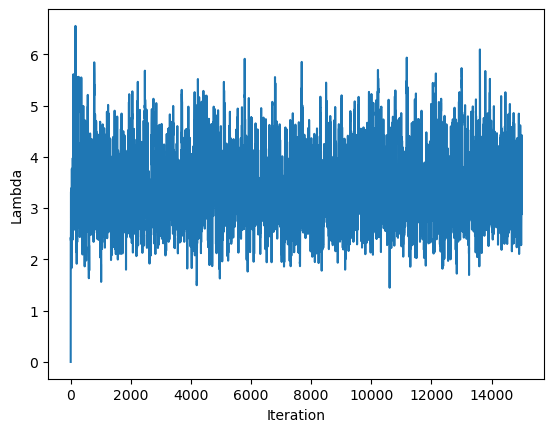

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az

# Define the likelihood, prior, and posterior functions
def likelihood(y, lambda_):
    return stats.poisson.pmf(y, lambda_)

def prior(lambda_, alpha=10, beta=2):
    return stats.gamma.pdf(lambda_, a=alpha, scale=1/beta)

def posterior(y, lambda_, alpha=10, beta=2):
    return np.prod(likelihood(y, lambda_)) * prior(lambda_, alpha, beta)

# Metropolis algorithm
def metropolis(y, n_samples=15000, alpha=10, beta=2):
    lambda_samples = np.zeros(n_samples)
    lambda_current = np.mean(y)

    for i in range(1, n_samples):
        lambda_proposed = np.random.normal(lambda_current, 0.5)

        if lambda_proposed <= 0:
            lambda_samples[i] = lambda_current
        else:
            p_current = posterior(y, lambda_current, alpha, beta)
            p_proposed = posterior(y, lambda_proposed, alpha, beta)

            if p_proposed / p_current > np.random.rand():
                lambda_current = lambda_proposed

        lambda_samples[i] = lambda_current

    return lambda_samples

# Data
y = np.array([3, 1, 4, 1, 5])

# Run the Metropolis algorithm and generate trace plot
lambda_samples = metropolis(y)
plt.plot(lambda_samples)
plt.xlabel("Iteration")
plt.ylabel("Lambda")
plt.show()

[b]

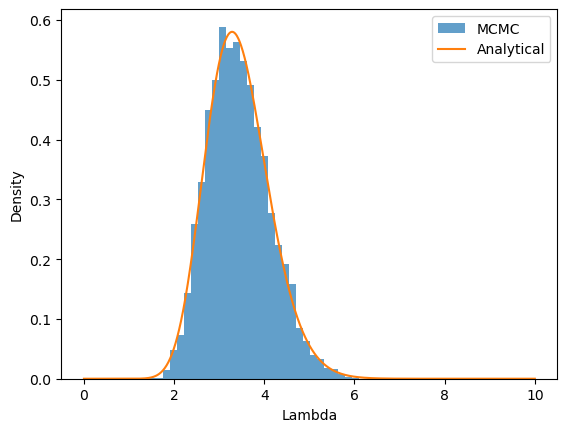

In [2]:
# Estimate the posterior density and produce the plot
lambda_samples = lambda_samples[5000:]
alpha_posterior = 10 + y.sum()
beta_posterior = 2 + len(y)
lambda_range = np.linspace(0, 10, 1000)
posterior_analytical = stats.gamma.pdf(lambda_range, a=alpha_posterior, scale=1/beta_posterior)
plt.hist(lambda_samples, density=True, bins=30, alpha=0.7, label="MCMC")
plt.plot(lambda_range, posterior_analytical, label="Analytical")
plt.xlabel("Lambda")
plt.ylabel("Density")
plt.legend()
plt.show()

[c]

In [4]:
# Generate a posterior predictive sample of calls for the next day
y_pred_samples = np.random.poisson(lambda_samples, size=len(lambda_samples))
predicted_calls = int(np.round(y_pred_samples.mean()))
print(f"Predicted number of calls for the next day: {predicted_calls}")
print(f"Theoretical prediction: {alpha_posterior / beta_posterior}")

# Compute the 90% hdi
hdi = az.hdi(y_pred_samples, hdi_prob=0.9)
print(f"90% HDI: {hdi[0]} to {hdi[1]}")

Predicted number of calls for the next day: 3
Theoretical prediction: 3.4285714285714284
90% HDI: 0 to 6
